In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression/sample_submission.csv
/kaggle/input/linear-regression/data_description.txt
/kaggle/input/linear-regression/train.csv
/kaggle/input/linear-regression/test.csv


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/linear-regression/train.csv')
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [10]:
import pandas as pd

df = pd.read_csv('/kaggle/input/linear-regression/train.csv')
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

X = df[features]
y = df[target]

X = X.fillna(X.mean())

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Features (X):
   GrLivArea  BedroomAbvGr  FullBath
0       1710             3         2
1       1262             3         2
2       1786             3         2
3       1717             3         1
4       2198             4         2

Target (y):
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [24]:
print("Missing values before filling:")
print(X.isnull().sum())
print("Data types:")
print(X.dtypes)

Missing values before filling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64
Data types:
GrLivArea       int64
BedroomAbvGr    int64
FullBath        int64
dtype: object


In [34]:
X['GrLivArea'] = pd.to_numeric(X['GrLivArea'], errors='coerce')
X['BedroomAbvGr'] = pd.to_numeric(X['BedroomAbvGr'], errors='coerce')
X['FullBath'] = pd.to_numeric(X['FullBath'], errors='coerce')

print("\nData types after conversion:")
print(X.dtypes)



Data types after conversion:
GrLivArea       int64
BedroomAbvGr    int64
FullBath        int64
dtype: object


In [38]:
X = X.fillna(X.mean())

print("\nNumber of missing values after filling:")
print(X.isnull().sum())



Number of missing values after filling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2}')


R^2 score: 0.6341189942328371


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


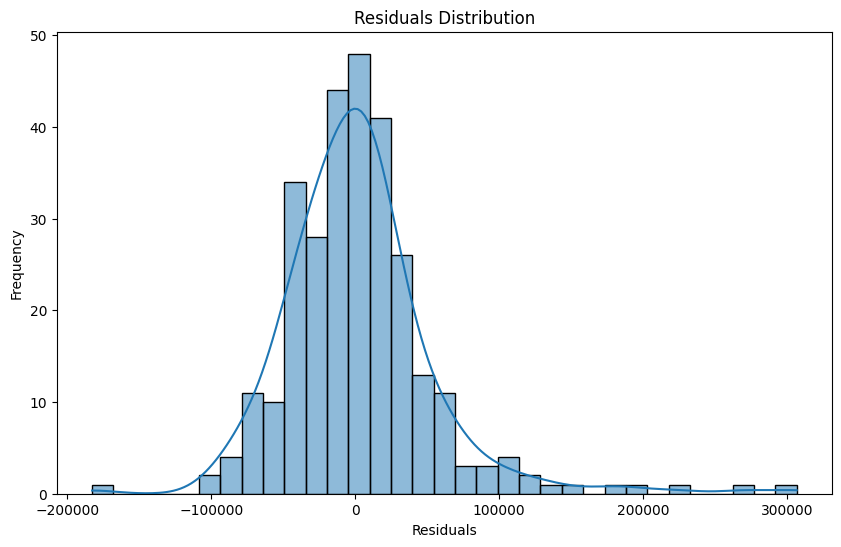

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

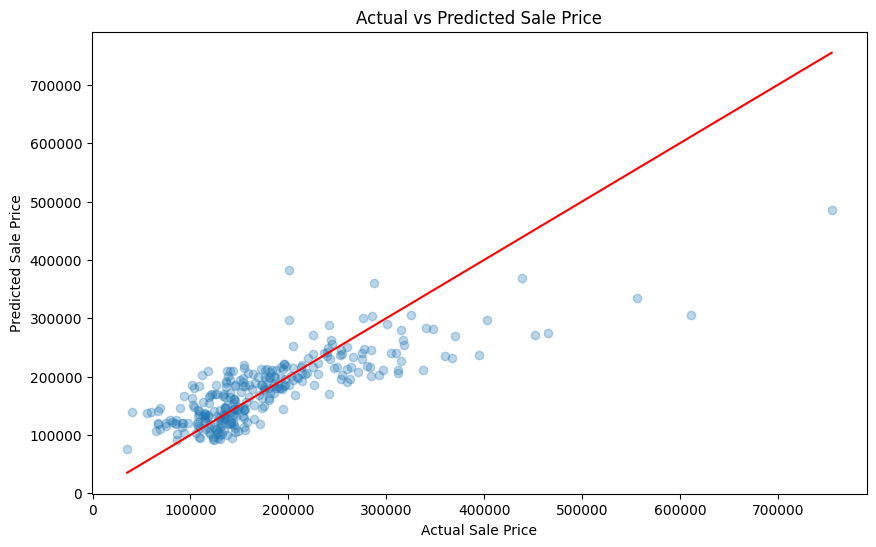

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()